# 4. Análisis técnico

El análisis técnico en finanzas es un enfoque que busca predecir el comportamiento futuro de los precios de activos financieros (como acciones, bonos, divisas o criptomonedas) a partir del estudio de datos históricos de precios y volúmenes de transacción. Se basa en la idea de que toda la información relevante del mercado ya está reflejada en el precio, y que los movimientos de los precios tienden a seguir patrones repetitivos debido al comportamiento colectivo de los inversionistas.

Su objetivo principal es detectar oportunidades de trading aprovechando patrones estadísticos o visuales en los datos, bajo la premisa de que la historia tiende a repetirse y que los precios se mueven en tendencias observables más que al azar.

In [15]:
!pip install TA-Lib --quiet

In [2]:
import pandas as pd
import talib
import yfinance as yf


In [17]:
df = yf.download("TSLA", start = "2024-01-01", end = "2024-12-31", auto_adjust=True, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


## SMA (Simple Moving Average)

Es uno de los indicadores más básicos y utilizados en el análisis técnico. Representa el promedio aritmético de los precios de un activo durante un número determinado de periodos, y se usa para suavizar las fluctuaciones de corto plazo y destacar la tendencia general del mercado.

- Si el precio está por encima del SMA, se interpreta como una tendencia alcista.
- Si el precio está por debajo, indica una tendencia bajista.

<Axes: xlabel='Date'>

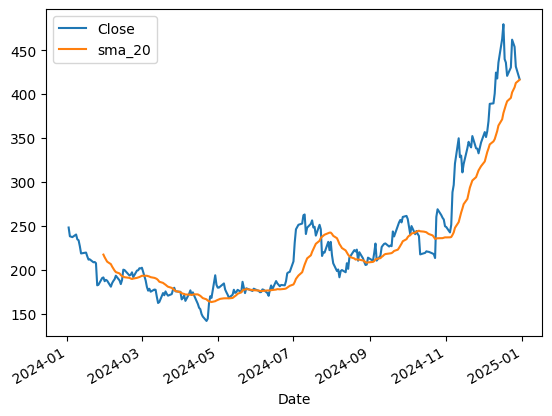

In [18]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod = 20)
df[["Close", "sma_20"]].plot()

## RSI (Relative Strength Index)

Es un indicador técnico oscilador que mide la velocidad y el cambio de los movimientos de precios de un activo. Se utiliza para identificar situaciones de sobrecompra o sobreventa, es decir, momentos en que el precio podría estar cerca de una reversión de tendencia. Se calcula de la siguiente forma:

$$
RSI_t = 100 - \frac{100}{1 + RS_t}
$$

$$
RS_t = \frac{\text{Promedio de ganancias}_t}{\text{Promedio de pérdidas}_t}
$$

donde $\Delta P_t = P_t - P_{t-1}$, si $\Delta P_t \gt 0$ se considera ganancia y si $\Delta P_t \leq 0$ se considera perdida.

Finalmente, el RSI toma valores entre 0 y 100, donde niveles sobre 70 indican sobrecompra y bajo 30 indican sobreventa.

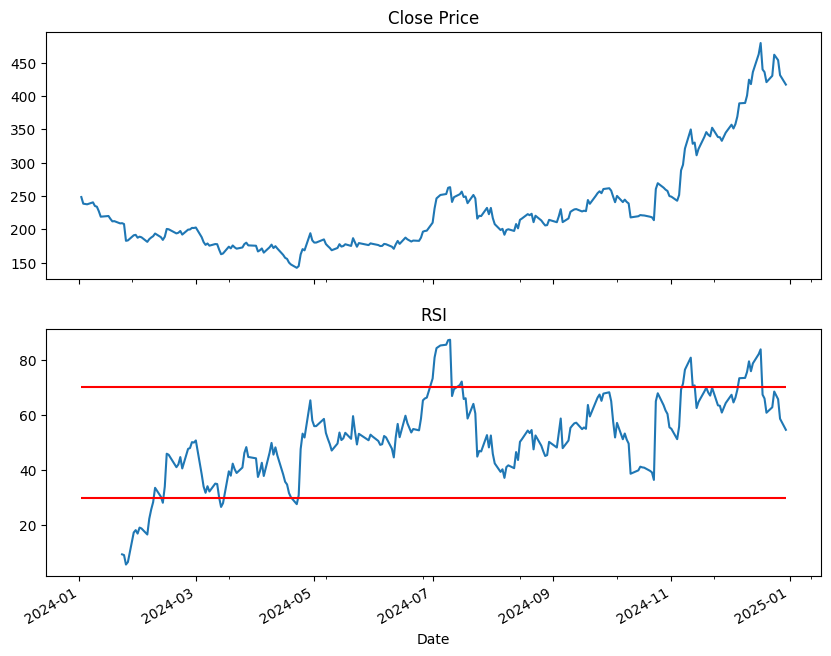

In [19]:
df["RSI"] = talib.RSI(df["Close"])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot Close price in the first subplot
df["Close"].plot(ax=ax[0], title="Close Price")

# Plot RSI in the second subplot
df["RSI"].plot(ax=ax[1], title = "RSI")
ax[1].hlines(y=30, xmin = df.index.min(), xmax = df.index.max(), color = "red")
ax[1].hlines(y=70, xmin = df.index.min(), xmax = df.index.max(), color = "red")

plt.show()

## MACD (Moving Average Convergence Divergence)

Es un indicador técnico de tendencia y momentum. Su objetivo es identificar cambios en la dirección, fuerza y duración de una tendencia en el precio de un activo, combinando información de medias móviles exponenciales (EMA).

El MACD se construye a partir de la diferencia entre dos medias móviles exponenciales (EMA) de distinta longitud, generalmente de 12 y 26 periodos:

$$
MACD_t = EMA_{12}(P_t) - EMA_{26}(P_t)
$$

Luego se calcula una línea de señal, que es una EMA (típicamente de 9 periodos) aplicada al propio MACD:

$$
\text{Señal}_t = EMA_{9}(MACD_t)
$$

Finalmente, la diferencia entre el MACD y su línea de señal genera el histograma, que muestra visualmente la fuerza del impulso:

$$
\text{Histograma}_t = MACD_t - \text{Señal}_t
$$

donde $EMA_t = \alpha \cdot P_t + (1 - \alpha) \cdot EMA_{t-1}$ y $\alpha = \frac{2}{n + 1}$

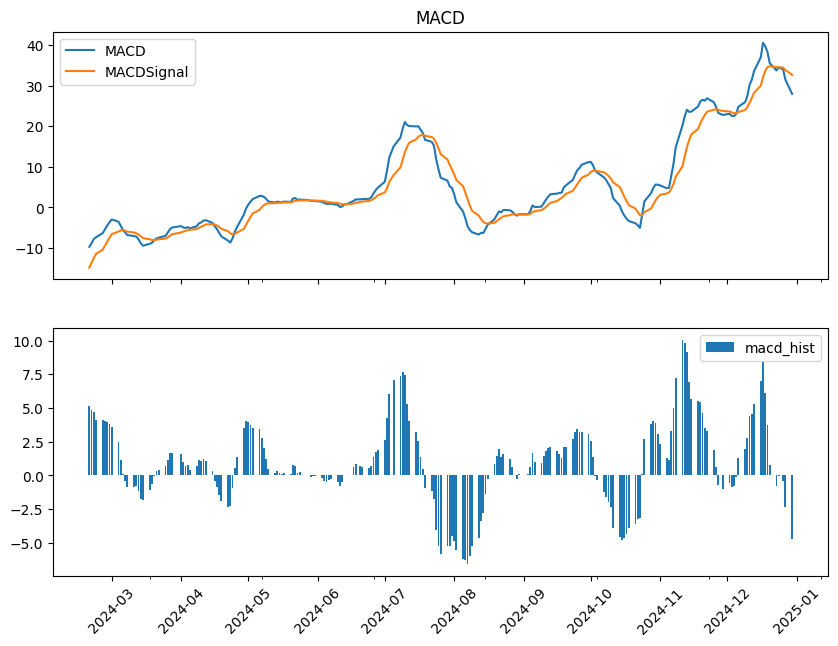

In [21]:
df["MACD"], df["MACDSignal"], df["MACDHist"] = talib.MACD(df["Close"],
                                                          fastperiod = 12,
                                                          slowperiod = 26,
                                                          signalperiod = 9)

fig, ax = plt.subplots(2,1,sharex = True, figsize=(10, 8))

df[["MACD", "MACDSignal"]].plot(ax=ax[0], title = "MACD")
ax[1].bar(df.index, df["MACDHist"].values, label = "macd_hist")
ax[1].legend()
plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees

plt.show()